In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from plotly.subplots import make_subplots
import pickle
import plotly.graph_objects as go
import plotly.express as px

import charset_normalizer
import fuzzywuzzy
from fuzzywuzzy import process
import os
import re
from dateutil import parser

import warnings

warnings.filterwarnings("ignore")
plt.style.use(
    "https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle"
)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# Character encoding


In [3]:
df_name = []
encoding = []
path = []

dataset_folder = "dataset"
for file in os.listdir(dataset_folder):
    file_path = os.path.join(dataset_folder, file)
    path.append(file_path)
    # look at the first ten thousand bytes to guess the character encoding
    with open(file_path, "rb") as rawdata:
        result = charset_normalizer.detect(rawdata.read())
        encoding.append(result["encoding"])
    # check what the character encoding might be
    file_name = os.path.splitext(file)[0]
    df_name.append(file_name)
    print(f"{file_name}: {result}")

context: {'encoding': 'ascii', 'language': 'English', 'confidence': 1.0}
mobile_plan_attr: {'encoding': 'ascii', 'language': 'English', 'confidence': 1.0}
mobile_plan_user: {'encoding': 'ascii', 'language': 'English', 'confidence': 1.0}
user: {'encoding': 'utf-8', 'language': 'English', 'confidence': 1.0}


In [4]:
data_source = (tuple(df_name), tuple(encoding), tuple(path))

In [5]:
context = pd.read_csv(data_source[2][0], encoding=data_source[1][0])
context.sample(5)

,id,purpose,go_with,weather,time,viettel_no_0,viettel_no_1,viettel_no_2,to_hanoi,to_other,score,direction
2236,1626,Visit,Al&&~one,Sunny,17:00,1,0,0,1,0,0,1
4436,11296,Travel,Friend(s),!&?S!unny,11 AM,1,1,0,0,1,21,0
5300,5591,Work,A%%l%one,Su!~%nny,7:00,1,1,0,1,0,0,1
8716,13395,Work,Al&o?ne,?!S%!unny,7 AM,1,1,0,1,0,0,1
1794,3389,Work,Alo ?ne,Sun~ny,6AM,1,0,0,1,0,0,1


In [6]:
mobile_plan_attr = pd.read_csv(
    data_source[2][1], encoding=data_source[1][1], delimiter=";"
)

mobile_plan_attr.sample(5)

,mobile_plan,description,price,duration
0,DATASILVER,"2GB/ day, high speed",100000,5d
4,DATACALL,"2GB/ day, high speed\n300 mins call for extern...",200000,5d
2,SOCIALMEDIA,"1GB/ day\nUnlimited for Tik Tok, Facebook, You...",150000,3d
1,DATAGOLD,"5GB/ day, high speed",200000,5d
3,SOCIALMEDIAGOLD,"3GB/ day, high speed\nUnlimited for Tik Tok, F...",250000,3d


In [7]:
mobile_plan_user = pd.read_csv(data_source[2][2], encoding=data_source[1][2])
mobile_plan_user.sample(5)

,id,mobile_plan,accept
12628,19996.0,SOCIALMEDIAGOLD,0.0
18411,16806.0,DATAGOLD,0.0
4208,16367.0,DATAGOLD,0.0
4311,9245.0,SOCIALMEDIAGOLD,1.0
6994,17886.0,SOCIALMEDIA,0.0


In [8]:
user = pd.read_csv(data_source[2][3], encoding=data_source[1][3])
user.sample(5)

,id,name,gender,age,education,profession,income,living_with,nation,phone,job,fb_freq,yt_freq,insta_freq,use_less_than_2GB,use_2GB_to_4GB
9719,4451,Lawrence Watkins,Male,35,NaN,Office & Administrative Support,375000000 VND,S ingle_0,ENGLAND,(234)773-8542x7546,Fashion designer,8,0,19,1,0
6615,3067,Scott Garza,Male,32,Bachelor,Business & Financial,5180000000 VND,Ma rr ied_1,ENGLAND,001-611-304-3826x93467,"Engineer, site",1,0,4,15,1
1675,18730,福田 涼平,Male,29,Highschool,Unemployed,1002500000 VND,Si ngle_0,JAPAN,070-0791-0380,行政書士,14,17,23,11,21
6225,8623,김혜진,Other,29,Masters,Healthcare Practitioners & Technical,36800$,U nma rr ied_0,KOREA,052-881-4426,학습지 및 방문 교사,1,12,3,0,0
8054,5785,Joseph Burnett,Male,26,Bachelor,Computer & Mathematical,702500000 VND,Married_1,ENGLAND,(921)246-0726x1179,Systems analyst,1,1,1,3,3


In [9]:
dataset = [context, mobile_plan_attr, mobile_plan_user, user]

# Cleaning

## Missing values check


In [10]:
for x in dataset:
  print('-----------------')
  print(x.isna().sum())

-----------------
id              0
purpose         0
go_with         0
weather         0
time            0
viettel_no_0    0
viettel_no_1    0
viettel_no_2    0
to_hanoi        0
to_other        0
score           0
direction       0
dtype: int64
-----------------
mobile_plan    0
description    0
price          0
duration       0
dtype: int64
-----------------
id                0
mobile_plan    2715
accept         2721
dtype: int64
-----------------
id                      0
name                    0
gender                  0
age                     0
education            4003
profession              0
income                  0
living_with             0
nation                  0
phone                   0
job                     0
fb_freq                 0
yt_freq                 0
insta_freq              0
use_less_than_2GB       0
use_2GB_to_4GB          0
dtype: int64


In [11]:
mobile_plan_user = mobile_plan_user.dropna(subset=['mobile_plan', 'accept'])

## Duplicate


In [12]:
user['id'].duplicated().sum()

0

In [13]:
context['id'].duplicated().sum()

0

In [14]:
mobile_plan_user.sort_values(by='id').head()

,id,mobile_plan,accept
18023,1000.0,SOCIALMEDIA,0.0
18022,1000.0,DATACALL,0.0
18021,1000.0,DATASILVER,0.0
3014,1000.0,DATASILVER,1.0
3087,1001.0,SOCIALMEDIA,1.0


## Context


In [15]:
context.sample(5)

,id,purpose,go_with,weather,time,viettel_no_0,viettel_no_1,viettel_no_2,to_hanoi,to_other,score,direction
4068,16924,Visit,A lone,R%&a~iny,19:00,1,0,0,1,0,4,1
7617,1563,Work,%A&&~lone,~Sun!ny,7:00,1,1,1,0,1,6,0
1819,19531,Travel,Friend(s),%?S&!unny,11:00,1,1,0,0,1,0,0
8699,17171,Travel,F&a~& mily,Sun?~ny,15:00,1,1,0,0,1,10,0
9409,5216,Travel,Frien?d (s),Sunny,20:00,1,0,0,0,1,7,0


In [16]:
for x in ["go_with", "weather"]:
    # Eliminate special characters and white spaces
    context[x] = context[x].apply(lambda x: re.sub(r"[^a-zA-Z\s]", "", x))

    # Lowercase all words
    context[x] = context[x].str.lower()

    print(context[x].unique())

['alone' 'friends' 'fa mily' 'family' 'fami ly' 'a l one' 'fr iends'
 ' alone' 'a lone' '  alone' ' friends' 'f riends' 'f rie nds' 'frie nds'
 'frien ds' 'f amily' ' family' 'alo ne' 'friend s' 'al one' 'fri ends'
 ' a lone' ' fri ends' 'f riend s' 'alon e' 'frien  ds' ' fri e nds'
 'friends ' 'a  lone' 'fa  mily' 'al  one' '   alone' 'fri e nds'
 ' al one' 'fam ily' '  family' 'f rien ds' '  a lone' ' f amily'
 'frie   nds' 'fri en ds' 'f a mily' ' frie nds' 'f  amily' 'fr  iends'
 ' fa mily' 'famil y' ' fr iends' 'fr ie nds' 'fr ien ds' ' f  amily'
 'fam  ily' ' frien ds' 'frie nd s' 'frie n ds' ' friend s' 'frie  nds'
 'fr i ends' 'fri  ends' 'f ri ends' ' a  lone' ' alo ne' 'friend  s'
 'a   lone' '  friends' '   friends' ' fam ily' 'f r iends' 'alo  ne'
 '  a  lone' ' fa  mily' 'f r  iends' 'f  riends' ' frie  nds' 'fri end s'
 ' fami ly' 'f rie  nds' ' f riends' ' al  one' 'f a  mily' ' fa m ily'
 '    alone' 'f  ri ends' 'a lo ne' 'frien d s' 'f am ily' '  f riends'
 '   family

In [17]:
# List of possible values for the column 'go_with'
choices = ["alone", "friend(s)", "family"]


# Apply the fuzzy matching to the column 'go_with'
def correct_name(name):
    return process.extractOne(name, choices)[0]


context["go_with"] = context["go_with"].apply(correct_name)

In [18]:
# Eliminate white spaces
context["time"] = context["time"].str.replace(r"\s+", "", regex=True)


# Function to convert time to 24-hour format
def convert_to_24hr_format(time_str):
    # Use dateutil.parser to parse the time string
    return parser.parse(time_str).strftime("%H:%M")


# Apply the function to the column 'time'
context["time"] = context["time"].apply(convert_to_24hr_format)
context["time"] = pd.to_datetime(context["time"], format="%H:%M")

In [19]:
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

context['hour'] = pd.to_datetime(context['time']).dt.hour
context['time_of_day'] = context['hour'].apply(time_of_day)

context = context.drop(columns=['time', 'hour'])

In [20]:
context["purpose"] = context["purpose"].str.strip()
context["purpose"] = context["purpose"].str.lower()

In [21]:
context.purpose.unique()

array(['travel', 'visit', 'work'], dtype=object)

In [22]:
context["purpose"] = context["purpose"].replace('travel', 'visit')

In [23]:
context = context.drop(axis=1, columns=["to_hanoi", "to_other"])

In [24]:
context.sample(5)

,id,purpose,go_with,weather,viettel_no_0,viettel_no_1,viettel_no_2,score,direction,time_of_day
7572,6351,visit,friend(s),sunny,1,1,0,16,0,afternoon
2418,15215,work,alone,sunny,1,1,1,11,0,morning
1795,1598,work,alone,sunny,1,0,0,0,0,morning
2344,7072,visit,friend(s),sunny,1,1,0,0,0,morning
258,9378,visit,friend(s),sunny,1,1,0,0,0,morning


## User


In [25]:
user.sample(5)

,id,name,gender,age,education,profession,income,living_with,nation,phone,job,fb_freq,yt_freq,insta_freq,use_less_than_2GB,use_2GB_to_4GB
3938,6328,Misty Sanchez,Female,26,Bachelor,Computer & Mathematical,37200$,Si n gle_0,ENGLAND,(712)719-6660x966,Adult nurse,0,1,7,1,0
6394,14757,Kelly Carter,Male,30,Highschool,Unemployed,45300$,S ingle_0,US,453-261-3706,Human resources officer,20,16,20,15,9
7906,18610,Courtney Stevens,Female,21,NaN,Student,7800$,S ingle_0,ENGLAND,(841)268-3663x4088,Airline pilot,12,6,5,6,3
8096,19803,Christina Carpenter,Female,22,NaN,Sales & Related,37500000 VND,Marr ied_0,AUSTRALIA,(07)-4381-9703,Editorial assistant,0,0,8,8,0
8786,13848,심민수,Male,29,NaN,Computer & Mathematical,1460000000 VND,Married_4,KOREA,064-761-3365,일반기계 조립원,0,1,2,0,2


In [26]:
# Eliminate white spaces
user["living_with"] = user["living_with"].str.strip()
user["living_with"] = user["living_with"].str.replace(r"\s+", "", regex=True)
user["living_with"] = user["living_with"].str.lower()

In [27]:
user["nation"] = user["nation"].str.strip()
user["nation"] = user["nation"].str.lower()

In [28]:
user["gender"] = user["gender"].str.strip()
user["gender"] = user["gender"].str.lower()

In [29]:
user["education"] = user["education"].str.strip()
user["education"] = user["education"].str.lower()

In [30]:
user.nation.unique()

array(['australia', 'england', 'korea', 'denmark', 'brazil', 'japan',
       'us', 'china', 'russia'], dtype=object)

In [31]:
user["nation"] = user["nation"].replace("australia", "oceania")
user["nation"] = user["nation"].replace(["brazil", "us"], "americas")
user["nation"] = user["nation"].replace(["denmark", "england", "russia"], "europe")
user["nation"] = user["nation"].replace(["korea", "japan", "china"], "asia")

In [32]:
user = user.rename(columns={"nation": "continent"})

In [33]:
currency_exchange_rate = 23000

# Function to clean and adjust income values
def clean_income(value):
    if 'VND' in value:
        return int(value.replace('VND', '')) / currency_exchange_rate
    elif '$' in value:
        return int(value.replace('$', ''))
    else:
        return int(value)

# Apply the function to the 'income' column
user['income_1'] = user['income'].apply(clean_income)

In [34]:
user['profession'] = user['profession'].str.lower()

In [35]:
user['profession'] = user['profession'].apply(lambda x: "jobs" if x not in ['student', 'retired', 'unemployed'] else x)

In [36]:
user["education"] = user["education"].fillna("unknown")
user["education"] = user["education"].replace("bachelor", "grad")
user["education"] = user["education"].replace(["associate", "highschool"], "undergrad")
user["education"] = user["education"].replace("masters", "postgrad")

In [37]:
user.living_with.unique()

array(['unmarried_2', 'unmarried_1', 'single_0', 'married_1', 'married_2',
       'married_4', 'married_3', 'unmarried_0', 'single_2', 'single_1',
       'single_4', 'single_3', 'divorced_2', 'divorced_1', 'divorced_3',
       'married_0', 'unmarried_4', 'divorced_4', 'widowed_0',
       'unmarried_3', 'widowed_4', 'widowed_1', 'widowed_3', 'widowed_2',
       'divorced_0'], dtype=object)

In [38]:
# Seperate Living_With column into Maritual_Status column and Children column
user[["marital_status", "children"]] = user["living_with"].str.split("_", expand=True)


user["marital_status"] = user["marital_status"].apply(
    lambda x: "relationship" if x == "married" else "single"
)

In [39]:
user['income_level'] = user['income_1'].apply(lambda x: 'lower' if x <= 30000 else 'lower-middle' if x > 30000 and x <= 58000 else 'middle' if x > 58000 and x <= 94000 else 'upper-middle' if x > 94000 and x <= 153000 else 'upper')

## mobile_plan_attr


In [40]:
mobile_plan_attr.head()

,mobile_plan,description,price,duration
0,DATASILVER,"2GB/ day, high speed",100000,5d
1,DATAGOLD,"5GB/ day, high speed",200000,5d
2,SOCIALMEDIA,"1GB/ day\nUnlimited for Tik Tok, Facebook, You...",150000,3d
3,SOCIALMEDIAGOLD,"3GB/ day, high speed\nUnlimited for Tik Tok, F...",250000,3d
4,DATACALL,"2GB/ day, high speed\n300 mins call for extern...",200000,5d


In [41]:
mobile_plan_attr['mobile_plan'] = mobile_plan_attr['mobile_plan'].str.lower()

In [42]:
mobile_plan_attr['duration'] = mobile_plan_attr['duration'].str.replace('d', '')

In [43]:
mobile_plan_attr['capacity'] = mobile_plan_attr['description'].str.extract(r'(\d+)GB')

In [44]:
mobile_plan_attr.head()

,mobile_plan,description,price,duration,capacity
0,datasilver,"2GB/ day, high speed",100000,5,2
1,datagold,"5GB/ day, high speed",200000,5,5
2,socialmedia,"1GB/ day\nUnlimited for Tik Tok, Facebook, You...",150000,3,1
3,socialmediagold,"3GB/ day, high speed\nUnlimited for Tik Tok, F...",250000,3,3
4,datacall,"2GB/ day, high speed\n300 mins call for extern...",200000,5,2


## mobile_plan_user


In [45]:
mobile_plan_user.head()

,id,mobile_plan,accept
0,11156.0,DATASILVER,1.0
1,4297.0,SOCIALMEDIAGOLD,1.0
2,13301.0,DATASILVER,1.0
3,9920.0,SOCIALMEDIAGOLD,1.0
4,8424.0,DATASILVER,1.0


In [46]:
mobile_plan_user['mobile_plan'] = mobile_plan_user['mobile_plan'].str.lower()

In [47]:
mobile_planes = mobile_plan_user.mobile_plan.unique()

### Mobile plan recommendation


In [48]:
mobile_plan_rec_raw = mobile_plan_user[["id"]]

# Create columns for each item in the mobile_plan_user dataframe
for item in mobile_planes:
    mobile_plan_rec_raw[item] = mobile_plan_user["mobile_plan"].apply(
        lambda x: 1 if x == item else np.nan
    )

# Check rows that have duplicated ID
duplicate_rows = mobile_plan_rec_raw[
    mobile_plan_rec_raw.duplicated(subset=["id"], keep=False)
]
# Sort by ID
duplicate_rows.sort_values("id")

# Fill missing values of each ID group
# In each ID group, each missing value will be replaced by the last valid value forward (ffill), otherwise, by the next valid value backward (bfill).
mobile_plan_rec = duplicate_rows.groupby("id").apply(
    lambda x: x.fillna(method="ffill").fillna(method="bfill")
)
mobile_plan_rec = mobile_plan_rec.drop_duplicates()

mobile_plan_rec = mobile_plan_rec.drop(axis=1, columns="id").reset_index()
mobile_plan_rec = mobile_plan_rec.drop(axis=1, columns="level_1")

mobile_plan_rec = mobile_plan_rec.fillna(0)
mobile_plan_rec

,id,datasilver,socialmediagold,socialmedia,datacall,datagold
0,1000.0,1.0,0.0,1.0,1.0,0.0
1,1001.0,0.0,0.0,1.0,1.0,0.0
2,1005.0,0.0,0.0,1.0,1.0,1.0
3,1006.0,0.0,0.0,1.0,1.0,0.0
4,1008.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...
10107,19992.0,0.0,1.0,1.0,1.0,0.0
10108,19996.0,0.0,1.0,1.0,1.0,1.0
10109,19997.0,1.0,1.0,0.0,0.0,1.0
10110,19998.0,1.0,1.0,1.0,0.0,0.0


### Mobile plan conversion rate


In [49]:
mobile_plan_accept = mobile_plan_user.pivot_table(
index="id", columns="mobile_plan", values="accept", aggfunc="sum", fill_value=0
).reset_index()

# Đảm bảo tất cả các cột trong mobile_planes có mặt trong bảng kết quả cuối cùng
for plan in mobile_planes:
  if plan not in mobile_plan_accept.columns:
    mobile_plan_accept[plan] = 0

# Sắp xếp lại các cột theo thứ tự trong mobile_planes
mobile_plan_accept = mobile_plan_accept[["id"] + list(mobile_planes)]

In [50]:
# Sử dụng pivot_table để tổng hợp dữ liệu
num_rec = mobile_plan_user.pivot_table(
    index="id", columns="mobile_plan", values="mobile_plan", aggfunc="count", fill_value=0
).reset_index()

# Đảm bảo tất cả các cột trong mobile_planes có mặt trong bảng kết quả cuối cùng
for plan in mobile_planes:
    if plan not in num_rec.columns:
        num_rec[plan] = 0

# Sắp xếp lại các cột theo thứ tự trong mobile_planes
num_rec = num_rec[["id"] + list(mobile_planes)]

# Đảm bảo rằng cả hai bảng đều có cùng thứ tự cột
assert list(mobile_plan_accept.columns) == list(num_rec.columns)

# Tạo bảng mobile_plan_cr bằng cách chia mobile_plan_accept cho num_rec
mobile_plan_cr = mobile_plan_accept.copy()

# Tính tỷ lệ chuyển đổi (conversion rate)
for plan in mobile_planes:
    mobile_plan_cr[plan] = mobile_plan_accept[plan] / num_rec[plan]

mobile_plan_cr.fillna(0, inplace=True)

# Hiển thị bảng mobile_plan_cr
mobile_plan_cr

mobile_plan,id,datasilver,socialmediagold,socialmedia,datacall,datagold
0,1000.0,0.5,0.0,0.0,0.0,0.0
1,1001.0,0.0,0.0,0.5,0.0,0.0
2,1002.0,0.0,1.0,0.0,0.0,0.0
3,1004.0,0.0,0.0,0.0,0.0,0.0
4,1005.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
11567,19994.0,0.0,0.0,0.0,0.0,0.0
11568,19996.0,0.0,0.0,0.0,1.0,0.0
11569,19997.0,1.0,0.0,0.0,0.0,0.0
11570,19998.0,0.0,0.0,0.0,0.0,0.0


# Data type check


In [51]:
dataset = [context, mobile_plan_attr, mobile_plan_cr, mobile_plan_rec, user]
for x in dataset:
    print("-------------------------")
    print(x.dtypes)

-------------------------
id               int64
purpose         object
go_with         object
weather         object
viettel_no_0     int64
viettel_no_1     int64
viettel_no_2     int64
score            int64
direction        int64
time_of_day     object
dtype: object
-------------------------
mobile_plan    object
description    object
price           int64
duration       object
capacity       object
dtype: object
-------------------------
mobile_plan
id                 float64
datasilver         float64
socialmediagold    float64
socialmedia        float64
datacall           float64
datagold           float64
dtype: object
-------------------------
id                 float64
datasilver         float64
socialmediagold    float64
socialmedia        float64
datacall           float64
datagold           float64
dtype: object
-------------------------
id                     int64
name                  object
gender                object
age                    int64
education             

In [52]:
mobile_plan_attr.duration = mobile_plan_attr.duration.astype(int)
mobile_plan_attr.capacity = mobile_plan_attr.capacity.astype(int)


mobile_plan_cr.id = mobile_plan_cr.id.astype(int)
mobile_plan_cr.datasilver = mobile_plan_cr.datasilver.astype(float)
mobile_plan_cr.socialmediagold = mobile_plan_cr.socialmediagold.astype(float)
mobile_plan_cr.socialmedia = mobile_plan_cr.socialmedia.astype(float)
mobile_plan_cr.datacall = mobile_plan_cr.datacall.astype(float)
mobile_plan_cr.datagold = mobile_plan_cr.datagold.astype(float)


mobile_plan_rec.id = mobile_plan_rec.id.astype(int)
mobile_plan_rec.datasilver = mobile_plan_rec.datasilver.astype(int)
mobile_plan_rec.socialmediagold = mobile_plan_rec.socialmediagold.astype(int)
mobile_plan_rec.socialmedia = mobile_plan_rec.socialmedia.astype(int)
mobile_plan_rec.datacall = mobile_plan_rec.datacall.astype(int)
mobile_plan_rec.datagold = mobile_plan_rec.datagold.astype(int)


user.children = user.children.astype(int)
user.income_1 = user.income_1.astype(int)

## Merge


In [53]:
df = (
  user.merge(context, on="id", how="left")
  .merge(mobile_plan_rec, on="id", how="left", suffixes=("", "_rec"))
  .merge(mobile_plan_cr, on="id", how="left", suffixes=("", "_cr"))
)

df.isna().sum()

id                       0
name                     0
gender                   0
age                      0
education                0
profession               0
income                   0
living_with              0
continent                0
phone                    0
job                      0
fb_freq                  0
yt_freq                  0
insta_freq               0
use_less_than_2GB        0
use_2GB_to_4GB           0
income_1                 0
marital_status           0
children                 0
income_level             0
purpose                  0
go_with                  0
weather                  0
viettel_no_0             0
viettel_no_1             0
viettel_no_2             0
score                    0
direction                0
time_of_day              0
datasilver            1460
socialmediagold       1460
socialmedia           1460
datacall              1460
datagold              1460
datasilver_cr            0
socialmediagold_cr       0
socialmedia_cr           0
d

In [54]:
df = df.dropna()

## Outliers


In [55]:
to_drop = ['id', 'name', 'income', 'living_with', 'phone', 'job', 'income_1']

In [56]:
df = df.drop(axis=1, columns=to_drop)

In [57]:
df.columns

Index(['gender', 'age', 'education', 'profession', 'continent', 'fb_freq',
       'yt_freq', 'insta_freq', 'use_less_than_2GB', 'use_2GB_to_4GB',
       'marital_status', 'children', 'income_level', 'purpose', 'go_with',
       'weather', 'viettel_no_0', 'viettel_no_1', 'viettel_no_2', 'score',
       'direction', 'time_of_day', 'datasilver', 'socialmediagold',
       'socialmedia', 'datacall', 'datagold', 'datasilver_cr',
       'socialmediagold_cr', 'socialmedia_cr', 'datacall_cr', 'datagold_cr'],
      dtype='object')

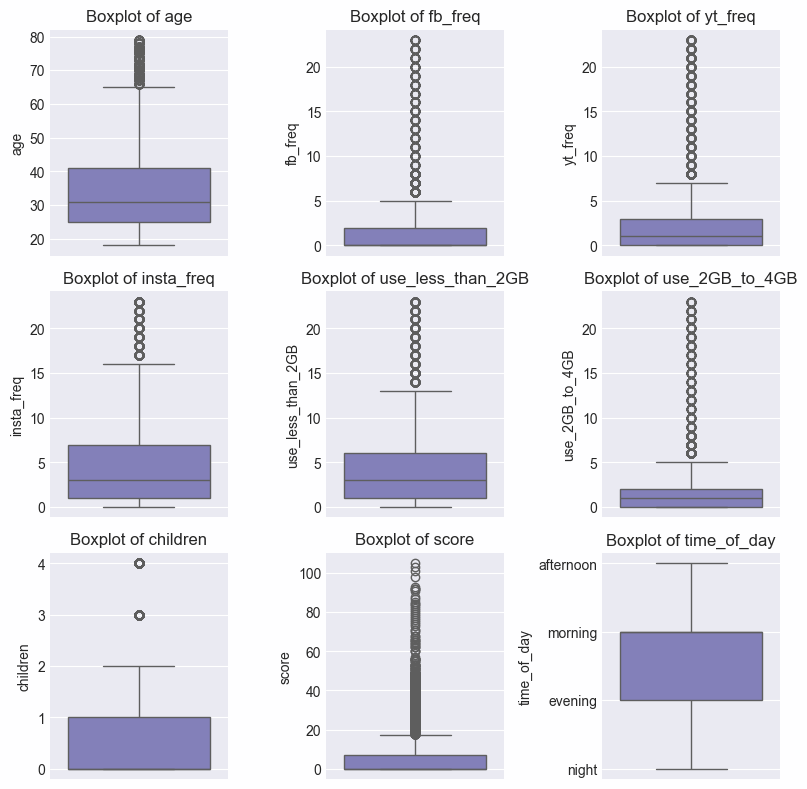

In [58]:
categorical_columns = ['gender', 'education', 'profession', 'income_level', 'continent', 'marital_status', 'purpose', 'go_with', 'weather', 'viettel_no_0', 'viettel_no_1', 'viettel_no_2', 'direction', 'datasilver', 'datagold', 'socialmedia', 'socialmediagold', 'datacall', 'datasilver_cr', 'socialmediagold_cr', 'socialmedia_cr', 'datacall_cr', 'datagold_cr']

continuous_columns = df.drop(axis=1, columns=categorical_columns).columns

# Create a canvas with 4 columns and 4 rows
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

# Draw boxplot on the canvas
for i, ax in enumerate(axes.flatten()):
    if i < len(continuous_columns):
        sns.boxplot(y=continuous_columns[i], data=df, ax=ax)
        ax.set_title(f'Boxplot of {continuous_columns[i]}')
        ax.set_ylabel(continuous_columns[i])
    else:
        ax.axis('off')

# Fit layout
plt.tight_layout()

plt.show()

In [59]:
# for x in continuous_columns:
#   range = 3
#   Q1 = df[x].quantile(0.25)
#   Q3 = df[x].quantile(0.75)
#   IQR = Q3 - Q1
#   lower_bound = Q1 - range * IQR
#   upper_bound = Q3 + range * IQR

#   df = df[(df[x] >= lower_bound) & (df[x] <= upper_bound)]

#   plt.show()

---


# input

In [60]:
labels = ['datasilver', 'datagold', 'socialmedia', 'socialmediagold', 'datacall']

# EDA

## Univariate


In [61]:
class EDA:
    
    def row(self,data):
        # Display the number of rows and columns in the dataframe
        fig = make_subplots(rows=1, cols=2)
        fig.add_trace(go.Indicator(mode = "number", value = data.shape[0], number={'font':{'color': '#E58F65','size':100}}, title = {"text": "🧾 Rows<br><span style='font-size:0.8em;color:gray'>In the Dataframe</span>"}, domain = {'x': [0, 0.5], 'y': [0.6, 1]}))
        fig.add_trace(go.Indicator(mode = "number", value = data.shape[1], number={'font':{'color': '#E58F65','size':100}}, title = {"text": "⭕ Columns<br><span style='font-size:0.8em;color:gray'>In the Dataframe</span>"}, domain = {'x': [0.5, 1], 'y': [0, 0.4]}))
        fig.show()
    
    def border_msg(self,msg, indent=1, width=None, title=None):
        """Print message-box with optional title."""
        lines = msg.split('\n')
        space = " " * indent
        if not width:
            width = max(map(len, lines))
        box = f'╔{"═" * (width + indent * 2)}╗\n'  
        if title:
            box += f'║{space}{title:<{width}}{space}║\n'  
            box += f'║{space}{"-" * len(title):<{width}}{space}║\n'  
        box += ''.join([f'║{space}{line:<{width}}{space}║\n' for line in lines])
        box += f'╚{"═" * (width + indent * 2)}╝' 
        print('\033[92m'+'\033[1m')
        print(box)
        
    def distribution(self,x,title):
        # Plot the distribution of a numerical column
        plt.figure(figsize=(10,8))
        ax = sns.distplot(x, kde=False,bins=30)
        values = np.array([rec.get_height() for rec in ax.patches])
        norm = plt.Normalize(values.min(), values.max())
        colors = plt.cm.jet(norm(values))
        for rec, col in zip(ax.patches,colors):
            rec.set_color(col)
        plt.title(title, size=20, color='black')
        
    def run(self,df):
        
        self.row(df)
        if len(df)>0:
            
            object_df = df.select_dtypes('object').columns.tolist()
            int_df = df.select_dtypes('int').columns.tolist()
            bool_df = df.select_dtypes('bool').columns.tolist()
            float_df = df.select_dtypes('float').columns.tolist()

            if len(object_df)>0:
                
                print( '\033[1m'+"OBJECT TYPE")
                for col in object_df:
                    # Display information about object type columns
                    self.border_msg(' '*25+ col.upper() + ' '*25)
                    self.border_msg('There are {} unique values in {} column'.format(df[col].nunique(),col.upper()))
                    plt.figure(figsize=(10,5))
                    sns.countplot(y = col, data = df,
                                  order = df[col].value_counts().index)
                    plt.show()
                    
            if len(int_df)>0:
                
                print('\033[1m'+"INT TYPE")
                for col in int_df:
                    # Display information about integer type columns
                    self.border_msg(' '*25+ col.upper() + ' '*25)
                    self.border_msg('Average value is : {}'.format(df[col].mean()))
                    self.border_msg('Minumum value is : {}'.format(df[col].min()))
                    self.border_msg('Maximum value is : {}'.format(df[col].max()))
                    self.distribution(df[col],title=col)
                    if df[col].mean()>df[col].std():
                        print(self.border_msg("Normal distributed Data Located below mean"))
                        
                    elif df[col].mean()<df[col].std():
                        print(self.border_msg("Normal distributed Data Located above mean"))
                    else:
                        self.border_msg("Mean Equals Std Dev - Distribution is normal")
                        
                    fig = make_subplots(rows=1, cols=2)
                    fig.add_trace(go.Indicator(mode = "number", value = df[col].mean(), number={'font':{'color': '#E58F65','size':100}}, title = {"text": "📌 Mean<br><span style='font-size:0.8em;color:gray'></span>"}, domain = {'x': [0, 0.5], 'y': [0.6, 1]}))
                    fig.add_trace(go.Indicator(mode = "number", value = df[col].std(), number={'font':{'color': '#E58F65','size':100}}, title = {"text": "🖇 Standart dev<br><span style='font-size:0.8em;color:gray'></span>"}, domain = {'x': [0.5, 1], 'y': [0, 0.4]}))
                    fig.show()
                    plt.show()
                 

            if len(bool_df)>0:
                
                print('\033[1m'+"BOOL TYPE")
                for col in bool_df:
                    # Display information about boolean type columns
                    self.border_msg(' '*25+ col.upper() + ' '*25)
                    plt.figure(figsize=(10,5))
                    sns.countplot(y = col, data = df,
                                  order = df[col].value_counts().index)
                    plt.show()
                    
            if len(float_df)>0:
                
                print('\033[1m'+"FLOAT TYPE")
                for col in float_df:
                    # Display information about float type columns
                    for col in int_df:
                        self.distribution(df[col],title=col)
                        if df[col].mean()>df[col].std():
                            print(self.border_msg("Normal distributed Data Located below mean"))
                        
                        elif df[col].mean()<df[col].std():
                            print(self.border_msg("Normal distributed Data Located above mean"))
                        else:
                            self.border_msg("Mean Equals Std Dev - Distribution is normal")

In [62]:
# frame = EDA().run(df)

In [63]:
to_check = ['age', 'fb_freq', 'yt_freq', 'insta_freq', 'use_less_than_2GB', 'use_2GB_to_4GB', 'viettel_no_0', 'viettel_no_1', 'viettel_no_2', 'score', 'direction', 'datasilver', 'socialmediagold', 'socialmedia', 'datacall', 'datagold', 'datasilver_cr', 'socialmediagold_cr','socialmedia_cr', 'datacall_cr', 'datagold_cr']

# model

In [64]:
df.columns

Index(['gender', 'age', 'education', 'profession', 'continent', 'fb_freq',
       'yt_freq', 'insta_freq', 'use_less_than_2GB', 'use_2GB_to_4GB',
       'marital_status', 'children', 'income_level', 'purpose', 'go_with',
       'weather', 'viettel_no_0', 'viettel_no_1', 'viettel_no_2', 'score',
       'direction', 'time_of_day', 'datasilver', 'socialmediagold',
       'socialmedia', 'datacall', 'datagold', 'datasilver_cr',
       'socialmediagold_cr', 'socialmedia_cr', 'datacall_cr', 'datagold_cr'],
      dtype='object')

In [65]:
import joblib
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss
from sklearn.pipeline import Pipeline

In [66]:
# Set random seed
seed = 42

# Initialize classifiers
models = {
    'Random Forest Classifier': RandomForestClassifier(random_state=seed),
    'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=seed),
    'AdaBoost Classifier': AdaBoostClassifier(random_state=seed),
    'Logistic Regression': LogisticRegression(random_state=seed),
    'SVC': SVC(),
    'KNeighbors Classifier': KNeighborsClassifier(),
    'XGBoost Classifier': XGBClassifier(random_state=seed)
}

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=seed)

# Prepare to collect results
results = []

# Initialize LabelEncoder dictionary
label_dict = {
    'labels': ['datasilver', 'datagold', 'socialmedia', 'socialmediagold', 'datacall'],
    'cr': ['datasilver_cr', 'datagold_cr', 'socialmedia_cr', 'socialmediagold_cr', 'datacall_cr']
}

In [67]:
# Iterate through each label in label_dict['labels']
for i, x in enumerate(label_dict['labels']):
    print(f"Training model for label {x}...")

    current_value = label_dict['cr'][i]
    other = [value for value in label_dict['cr'] if value != current_value]
    features = df.drop(axis=1, columns=label_dict['labels'] + other)

    X = features
    y = df[x]

    # Encode categorical columns
    check = (X.dtypes == 'object') | (X.dtypes == 'category')
    object_columns = list(check[check].index)

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), X.columns.difference(object_columns)),
            ('cat', OneHotEncoder(), object_columns)
        ],
        remainder='passthrough'
    )

    model_results = []
    best_model = None
    best_accuracy = 0

    for name, model in models.items():
        accuracy_cv_scores = []
        hamming_cv_losses = []
        precision_scores = []
        recall_scores = []
        f1_scores = []

        # Train the model using KFold
        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            pipeline = Pipeline(steps=[
                ('preprocessor', preprocessor),
                ('classifier', model)
            ])

            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)

            # Metrics
            acc = accuracy_score(y_test, y_pred)
            hamming = hamming_loss(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='micro')
            recall = recall_score(y_test, y_pred, average='micro')
            f1 = f1_score(y_test, y_pred, average='micro')

            accuracy_cv_scores.append(acc)
            hamming_cv_losses.append(hamming)
            precision_scores.append(precision)
            recall_scores.append(recall)
            f1_scores.append(f1)

        # Calculate the mean of each metric
        mean_accuracy = np.mean(accuracy_cv_scores)
        mean_hamming_loss = np.mean(hamming_cv_losses)
        mean_precision = np.mean(precision_scores)
        mean_recall = np.mean(recall_scores)
        mean_f1_score = np.mean(f1_scores)

        # Save model results
        model_results.append({
            'Model': name,
            'Mean Accuracy': mean_accuracy,
            'Mean Hamming Loss': mean_hamming_loss,
            'Mean Precision': mean_precision,
            'Mean Recall': mean_recall,
            'Mean F1-score': mean_f1_score
        })

        # Update the best model if current model is better
        if mean_accuracy > best_accuracy:
            best_accuracy = mean_accuracy
            best_model = pipeline

    # Save the best model for the current label
    joblib.dump(best_model, f'best_model_{x}.pkl')

    # Convert results to DataFrame and sort by Mean Accuracy
    model_results_df = pd.DataFrame(model_results)
    model_results_df = model_results_df.sort_values(by='Mean Accuracy', ascending=False)

    # Keep top 3 models
    top_3_models = model_results_df.head(3)

    # Print top 3 models and their metrics
    print(f"Top 3 models for label {x}:")
    print(top_3_models)
    print("*" * 50)

    # Add label information and append to results
    top_3_models['Label'] = x
    results.append(top_3_models)

# Concatenate all results
final_results = pd.concat(results, ignore_index=True)

Training model for label datasilver...
Top 3 models for label datasilver:
                          Model  Mean Accuracy  Mean Hamming Loss  \
4                           SVC       0.602651           0.397349   
1  Gradient Boosting Classifier       0.595927           0.404073   
3           Logistic Regression       0.594344           0.405656   

   Mean Precision  Mean Recall  Mean F1-score  
4        0.602651     0.602651       0.602651  
1        0.595927     0.595927       0.595927  
3        0.594344     0.594344       0.594344  
**************************************************
Training model for label datagold...
Top 3 models for label datagold:
                      Model  Mean Accuracy  Mean Hamming Loss  Mean Precision  \
4                       SVC       0.559434           0.440566        0.559434   
0  Random Forest Classifier       0.556864           0.443136        0.556864   
6        XGBoost Classifier       0.554488           0.445512        0.554488   

   Mean Rec

In [68]:
final_results

,Model,Mean Accuracy,Mean Hamming Loss,Mean Precision,Mean Recall,Mean F1-score,Label
0,SVC,0.602651,0.397349,0.602651,0.602651,0.602651,datasilver
1,Gradient Boosting Classifier,0.595927,0.404073,0.595927,0.595927,0.595927,datasilver
2,Logistic Regression,0.594344,0.405656,0.594344,0.594344,0.594344,datasilver
3,SVC,0.559434,0.440566,0.559434,0.559434,0.559434,datagold
4,Random Forest Classifier,0.556864,0.443136,0.556864,0.556864,0.556864,datagold
5,XGBoost Classifier,0.554488,0.445512,0.554488,0.554488,0.554488,datagold
6,SVC,0.651601,0.348399,0.651601,0.651601,0.651601,socialmedia
7,Gradient Boosting Classifier,0.651107,0.348893,0.651107,0.651107,0.651107,socialmedia
8,Logistic Regression,0.646953,0.353047,0.646953,0.646953,0.646953,socialmedia
9,SVC,0.586432,0.413568,0.586432,0.586432,0.586432,socialmediagold


In [69]:
view = pd.merge(final_results.groupby('Label').max('Mean Accuracy'), final_results[['Label', 'Model', 'Mean Accuracy']], on=['Label', 'Mean Accuracy'], how='inner')
view

,Label,Mean Accuracy,Mean Hamming Loss,Mean Precision,Mean Recall,Mean F1-score,Model
0,datacall,0.575652,0.429689,0.575652,0.575652,0.575652,SVC
1,datagold,0.559434,0.445512,0.559434,0.559434,0.559434,SVC
2,datasilver,0.602651,0.405656,0.602651,0.602651,0.602651,SVC
3,socialmedia,0.651601,0.353047,0.651601,0.651601,0.651601,SVC
4,socialmediagold,0.586432,0.422963,0.586432,0.586432,0.586432,SVC


----------------